# Language Classification Hackathon Exam

**Ayodele Marcus Submission**

**Overview**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


In [94]:
# data loading and manipulation packages
import pandas as pd
from nltk import tokenize
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# data Visualisation Packages
import seaborn as sns
import matplotlib.pyplot as plt

# data modeling and evaluation packages
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [100]:
df_train=pd.read_csv("train_set.csv")
df_test=pd.read_csv("test_set.csv")

In [101]:
df_test.shape

(5682, 2)

In [102]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

Thera are no null values in the data set

In [103]:
df_train.shape

(33000, 2)

In [104]:
df_train.shape

(33000, 2)

In [105]:
df_test.shape

(5682, 2)

In [106]:
df_train.columns

Index(['lang_id', 'text'], dtype='object')

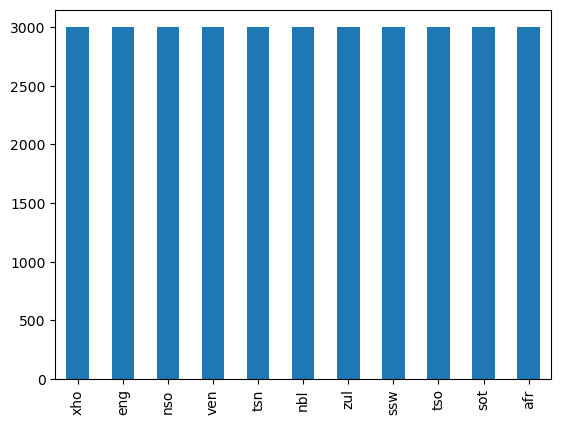

In [107]:
df_train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

In [108]:
df_train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [109]:
df_train[df_train["lang_id"]=="xho"]

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
28,xho,langa eli xesha nesizathu salo zingasinika ama...
43,xho,abafaki-zicelo abadla umhlala-phantsi ncedani ...
59,xho,intsilelo ligcisa ukthobela ukuziphatha okumis...
...,...,...
32972,xho,akukho nzala iya kuhlawulwa kwintlawulo eyenzi...
32974,xho,bhede bhota zizi bhota dlamini bexhawulana tyh...
32978,xho,eli candelo alibabopheleli abaphathi abakwizik...
32979,xho,ndivumele nkosikazi somlomo nosihlalo ngokupha...


In [110]:
import pandas as pd

def add_word_count_column(df, text_column, new_column_name):
    """
    Add a new column to the DataFrame to store word counts.

    Args:
    - df (DataFrame): The input DataFrame.
    - text_column (str): The name of the column containing the texts.
    - new_column_name (str): The desired name for the new column.

    Returns:
    - DataFrame: The modified DataFrame with the new column added.
    """
    df[new_column_name] = df[text_column].apply(lambda x: len(x.split()))
    return df


In [111]:
add_word_count_column(df_train,"text","length")

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,24
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,31
2,eng,the province of kwazulu-natal department of tr...,37
3,nso,o netefatša gore o ba file dilo ka moka tše le...,40
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,49
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,63
32997,eng,closing date for the submission of completed t...,37
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,26


In [112]:
df_train

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,24
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,31
2,eng,the province of kwazulu-natal department of tr...,37
3,nso,o netefatša gore o ba file dilo ka moka tše le...,40
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,49
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,63
32997,eng,closing date for the submission of completed t...,37
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,26


In [113]:
pp=df_train.groupby("lang_id").mean()
pp.sort_values("length",ascending=True)

,length
lang_id,
nbl,25.746000
ssw,26.319000
zul,26.595667
xho,27.293333
afr,39.285333
eng,40.233333
tso,42.775667
ven,44.261333
tsn,44.930333


## Check what texts are common in the different languages

In [114]:
# Get unique language IDs from the 'lang_id' column
unique_languages=df_train["lang_id"].unique()
unique_languages

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

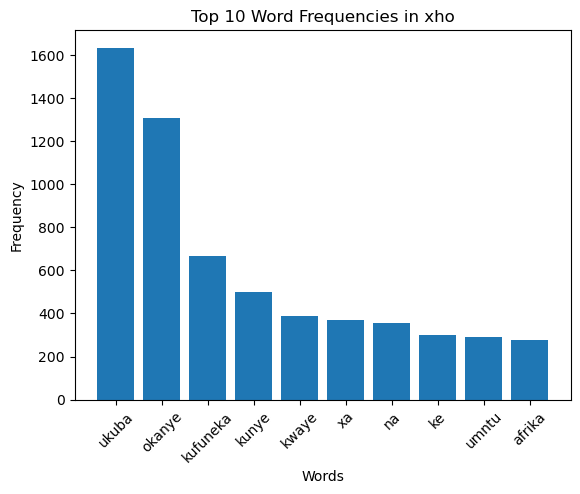

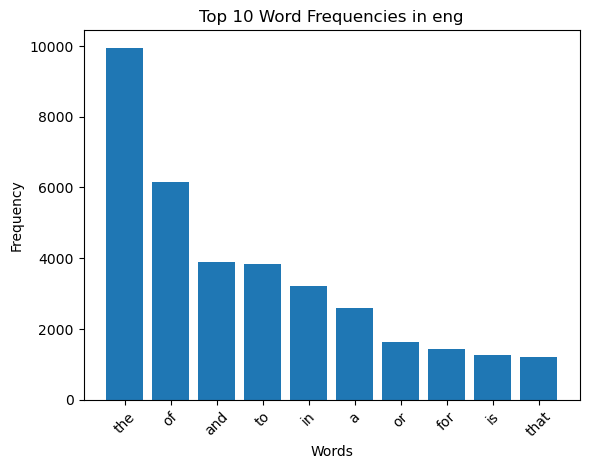

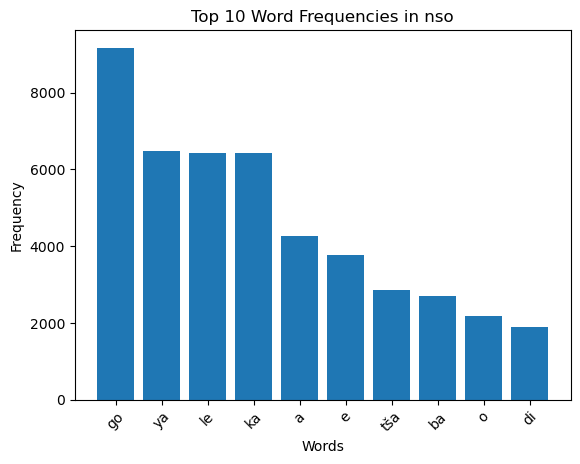

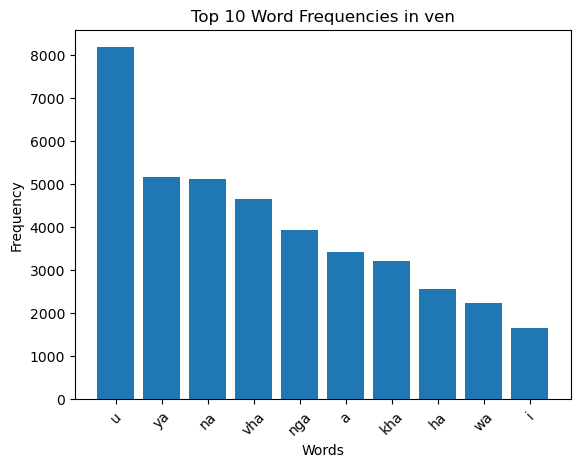

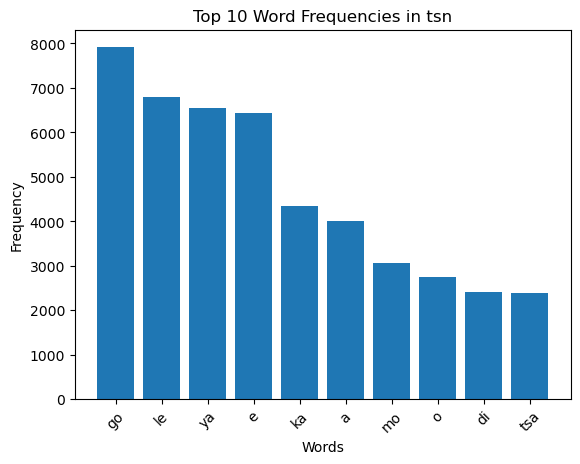

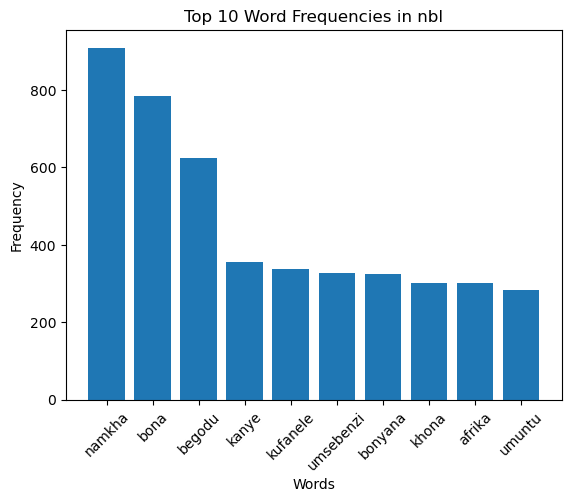

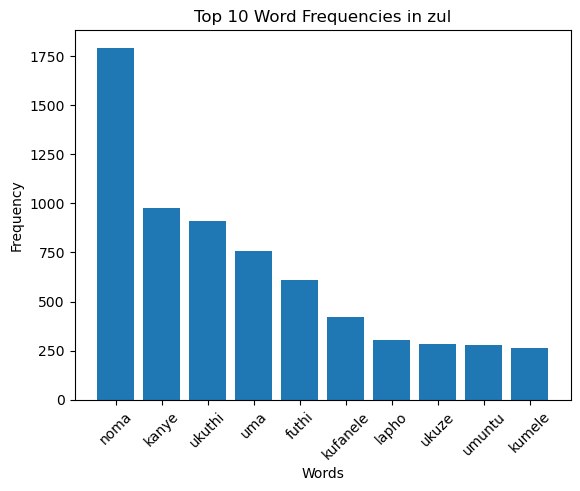

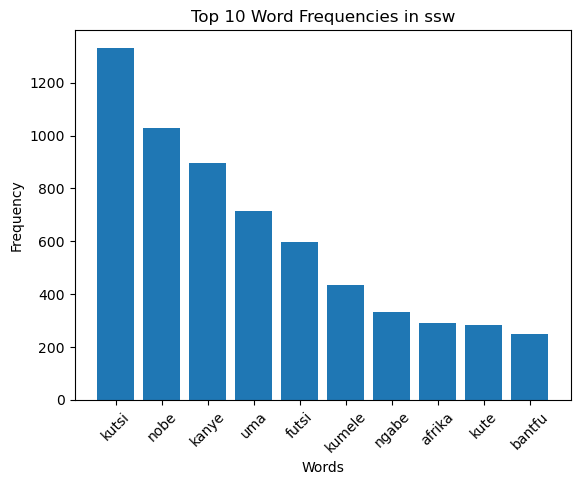

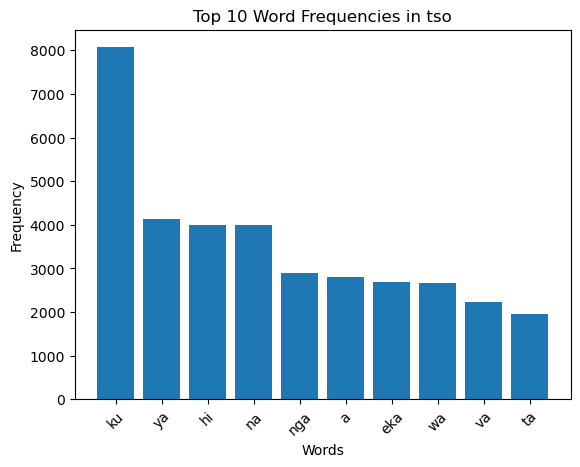

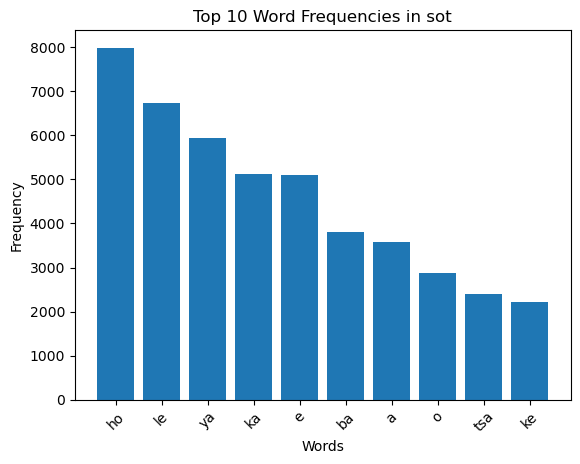

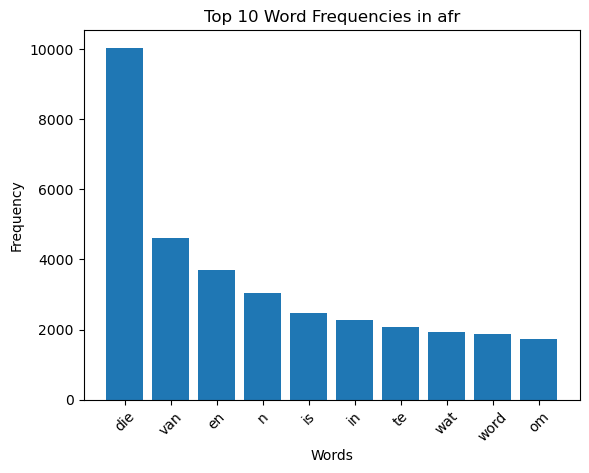

In [115]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Iterate through each language ID
for i in unique_languages:
    # Combine text data for each language
    combined_text = ' '.join(df_train[df_train['lang_id'] == i]['text'])  # Replace '1' with the desired language ID

    # Tokenize the combined text into words
    words = combined_text.split()

    # Calculate word frequencies using Counter
    word_freq = Counter(words)

    # Extract the most common words and their frequencies
    top_words = word_freq.most_common(10)  # Change the number '10' to get the desired number of top words

    # Plot the word frequencies
    labels, frequencies = zip(*top_words)
    plt.bar(labels, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Word Frequencies in '+i)
    plt.xticks(rotation=45)
    plt.show()


Convert the 'text' column in the DataFrame to lowercase and remove punctuation

In [131]:
#Convert message to lower case
def clean_data(text):
 
    text = text.lower()
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    return text

In [132]:
# Clean the train dataset
df_train['text'] = df_train['text'].apply(clean_data)

# Clean the test dataset
df_test['text'] = df_test['text'].apply(clean_data)

df_train.head()

,lang_id,text,length
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,24
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,31
2,eng,the province of kwazulunatal department of tra...,37
3,nso,o netefatša gore o ba file dilo ka moka tše le...,40
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43


View the data frame

In [118]:
df_train.head()

,lang_id,text,length
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,24
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,31
2,eng,the province of kwazulunatal department of tra...,37
3,nso,o netefatša gore o ba file dilo ka moka tše le...,40
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43


In [133]:
#Access the cleaned text 
df_test['text'] = df_test['text'].apply(clean_data)

df_train.head()

,lang_id,text,length
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,24
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,31
2,eng,the province of kwazulunatal department of tra...,37
3,nso,o netefatša gore o ba file dilo ka moka tše le...,40
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43


In [134]:
# Stored in the 'X' variable
X=df_train["text"]
X.shape

(33000,)

In [135]:
X.head()

0    umgaqosiseko wenza amalungiselelo kumaziko axh...
1    idha iya kuba nobulumko bokubeka umsebenzi nap...
2    the province of kwazulunatal department of tra...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

In [136]:
y=df_train["lang_id"]
y.shape

(33000,)

In [137]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=20)

Now we convert our text features to integers

In [138]:
vectorizer = TfidfVectorizer(ngram_range=(4,8), 
                             analyzer='char', 
                             min_df=5, 
                             max_df = 0.7)

## Create and fit a machine learning model using the vectorizer and training data

In [139]:
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

AttributeError: lower not found

In [57]:
rc=RidgeClassifier()
rc.fit(x_train,y_train)

RidgeClassifier()

In [58]:
results=rc.predict(x_test)
DAF=pd.DataFrame(results,columns=["lang_id"])
DAF.head()

,lang_id
0,xho
1,zul
2,nbl
3,ssw
4,ssw


In [59]:
output=pd.DataFrame({"index":df_test["index"]})
submission=output.join(DAF)
submission.head()

,index,lang_id
0,1,xho
1,2,zul
2,3,nbl
3,4,ssw
4,5,ssw


In [60]:
submission.to_csv("RidgeClas.csv",index=False)

In [61]:
SG=SGDClassifier()
SG.fit(x_train,y_train)

SGDClassifier()

In [62]:
results=SG.predict(x_test)
DAF=pd.DataFrame(results,columns=["lang_id"])
DAF.head()

,lang_id
0,xho
1,zul
2,nbl
3,ssw
4,ssw


In [63]:
output=pd.DataFrame({"index":df_test["index"]})
submission=output.join(DAF)
submission.head()

,index,lang_id
0,1,xho
1,2,zul
2,3,nbl
3,4,ssw
4,5,ssw


In [64]:
submission.to_csv("SGD.csv",index=False)

In [54]:
def create_model(vectorizer, model, x_train, y_train): 
    model = pipeline.Pipeline([
        ('vectorizer', vectorizer),
        ('clf', model())
    ])
    return model.fit(x_train,y_train)

In [55]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))

# Logistic Regression

In [65]:
lgr_model = create_model(vectorizer, LogisticRegression, x_train, y_train)
evaluate(lgr_model, x_val, y_val)

AttributeError: lower not found

In [45]:
transformed_xtest = vectorizer.transform(df_test["text"])

In [46]:
results = lgr_model.predict(transformed_xtest)

AttributeError: lower not found

In [44]:
results=lgr_model.predict(transformed_xtest)

AttributeError: lower not found

In [43]:
DAF=pd.DataFrame(results,columns=["lang_id"])
DAF.head()

NameError: name 'results' is not defined

In [101]:
output=pd.DataFrame({"index":df_test["index"]})
submission=output.join(DAF)
submission.head()

,index,lang_id
0,1,xho
1,2,xho
2,3,eng
3,4,nso
4,5,ven


In [102]:
submission.to_csv("Final.csv",index=False)